# House predictions with linear regression

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [48]:
df_house_predictions = pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/machine_learning/1-regresion-lineal/Hyderabad.csv')
df_house_predictions

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


___

## Revisión de nulos

In [49]:
df_house_predictions.isnull().sum()

Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0
Refrigerator           0


___

## Revisión de outliers

In [50]:
df_house_predictions['Price'].describe()

count    2.518000e+03
mean     9.818380e+06
std      8.777113e+06
min      2.000000e+06
25%      4.760000e+06
50%      7.754000e+06
75%      1.090000e+07
max      1.650000e+08
Name: Price, dtype: float64

In [51]:
df_house_predictions['Area'].describe()

count    2518.000000
mean     1644.571088
std       746.256956
min       500.000000
25%      1160.000000
50%      1500.000000
75%      1829.000000
max      9400.000000
Name: Area, dtype: float64

<Axes: xlabel='Price'>

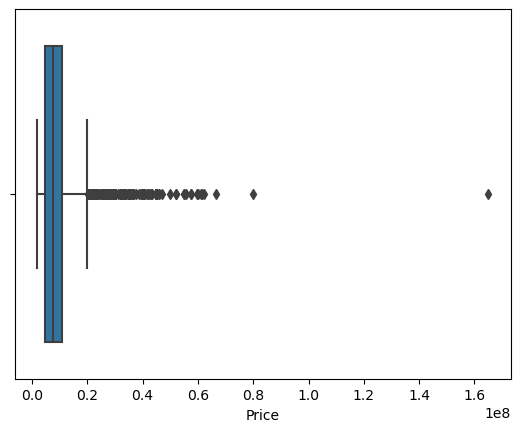

In [52]:
sns.boxplot(x=df_house_predictions['Price'])

In [53]:
# Elimino los outliers


<Axes: xlabel='Area'>

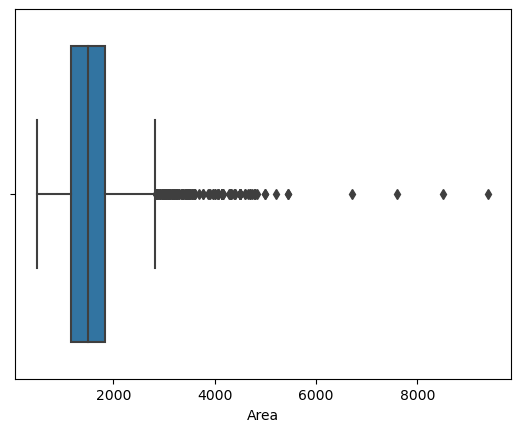

In [54]:
sns.boxplot(x=df_house_predictions['Area'])

___

## 1) Exploring the relationship between price and area

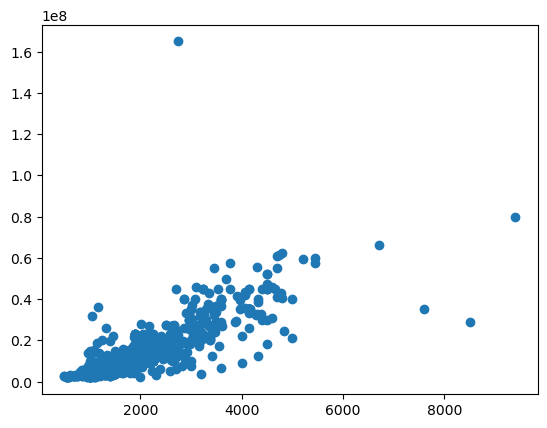

In [55]:
plt.scatter(df_house_predictions['Area'], df_house_predictions['Price'])


___

## 2) Crear un model simple de regresión lineal entre area y precio

In [56]:
model = smf.ols(formula='Price ~ Area', data=df_house_predictions)
model = model.fit()
model


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [57]:
print(model.params)

Intercept   -6.222669e+06
Area         9.753941e+03
dtype: float64


___

## 3) Crear un regplot con seaborn para visualizar el modelo

<Axes: xlabel='Area', ylabel='Price'>

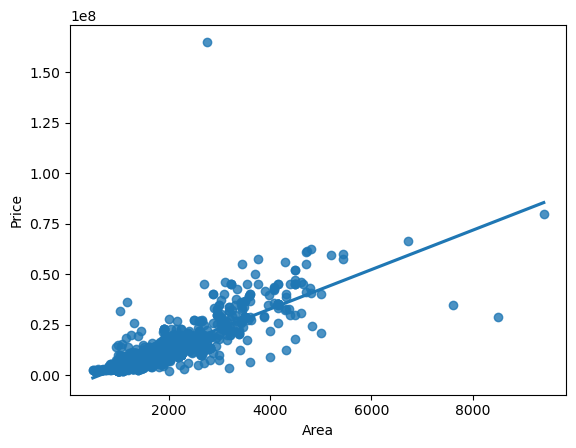

In [58]:
sns.regplot(x=df_house_predictions['Area'], y=df_house_predictions['Price'], data=df_house_predictions, ci=None)

___

## 4) Building a model that uses all the features

In [59]:
df_house_predictions

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,6968000,1340,Nizampet,2,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
1,29000000,3498,Hitech City,4,0,0,1,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,6590000,1318,Manikonda,2,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5739000,1295,Alwal,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,5679000,1145,Kukatpally,2,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,11000000,1460,Nacharam,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2514,26000000,1314,Manikonda,2,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2515,13300000,2625,Madhapur,3,1,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2516,10800000,2050,Hitech City,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [60]:
model2 = smf.ols(formula='Price ~ Gymnasium + Area + Resale + SwimmingPool + LandscapedGardens + BED + TV + Sofa + DiningTable', data=df_house_predictions)
model2 = model2.fit()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [61]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     630.8
Date:                Fri, 20 Oct 2023   Prob (F-statistic):               0.00
Time:                        10:48:37   Log-Likelihood:                -42340.
No. Observations:                2518   AIC:                         8.470e+04
Df Residuals:                    2508   BIC:                         8.476e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -6.31e+06   2.39e+05    -26.375      0.000   -6.78e+06   -5.84e+06
Gymnasium         -2.614e+05   4.37e+05     -0.599      0.550   -1.12e+06    5.95e+05
Area               9452.1471    139.914     67.557      0.000    9177.788    9726.506
Resale             1.424e+06   2.45e+05      5.816      0.000    9.44e+05     1.9e+06
SwimmingPool       7.517e+05   4.62e+05      1.626      0.104   -1.55e+05    1.66e+06
LandscapedGardens  3.846e+05   3.12e+05      1.233      0.218   -2.27e+05    9.96e+05
BED                 4.67e+05   5.04e+05      0.926      0.355   -5.22e+05    1.46e+06
TV                 1.465e+04    7.9e+05      0.019      0.985   -1.53e+06    1.56e+06
Sofa              -1.413e+06   7.83e+05     -1.804      0.071   -2.95e+06    1.22e+05
DiningTable       -2.255e+04   9.51e+05     -0.024      0.981   -1.89e+06    1.84e+06
==============================================================================
Omnibus:                     4256.803   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10838678.373
Skew:                          10.778   Prob(JB):                         0.00
Kurtosis:                     323.691   Cond. No.                     2.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
model2.rsquared

0.6936002723105748

___

## 5) Inferencia

In [63]:
house = pd.DataFrame({'Area': [1000], 'No. of Bedrooms':[3]})
house

,Area,No. of Bedrooms
0,1000,3


In [64]:
model.predict(house)

0    3.531272e+06
dtype: float64